In [1]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from pandas.util import hash_pandas_object
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
FTeS=pd.read_csv('fraudTest.csv')
FTrS=pd.read_csv('fraudTrain.csv')

# Data properties

In [5]:
FTeS.shape

(555719, 23)

In [6]:
FTrS.shape

(1296675, 23)

# Do they have the same number of columns?

In [7]:
def match_dataframe_columns(df_train, df_test):
    try:
        return(all(df_train.columns == df_test.columns))
    except:
        return(False)

In [8]:
match_dataframe_columns(FTeS, FTrS)

True

# Conflated data set of Train and Test

In [9]:
Data = pd.concat([FTeS, FTrS], ignore_index=False)

In [10]:
Data.shape

(1852394, 23)

In [11]:
Data.head(20)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
5,5,2020-06-21 12:15:37,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,...,42.1939,-76.7361,520,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0
6,6,2020-06-21 12:15:44,213180742685905,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,...,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0
7,7,2020-06-21 12:15:50,3589289942931264,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,...,43.7557,-97.5936,343,"Development worker, international aid",1972-03-05,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,0
8,8,2020-06-21 12:16:10,3596357274378601,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,...,41.0001,-78.2357,3688,Advice worker,1973-05-27,71a1da150d1ce510193d7622e08e784e,1371816970,41.546067,-78.120238,0
9,9,2020-06-21 12:16:11,3546897637165774,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,...,31.6591,-96.8094,263,Barrister,1956-05-30,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,0


In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

In [13]:
Data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [14]:
Data.isnull

<bound method DataFrame.isnull of          Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2020-06-21 12:14:25     2291163933867244   
1                 1   2020-06-21 12:14:33     3573030041201292   
2                 2   2020-06-21 12:14:53     3598215285024754   
3                 3   2020-06-21 12:15:15     3591919803438423   
4                 4   2020-06-21 12:15:17     3526826139003047   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                     merchant        category     amt  \
0                       fraud_Kirlin and Sons   personal_care    2.86   
1                        fr

In [15]:
Data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

<AxesSubplot:>

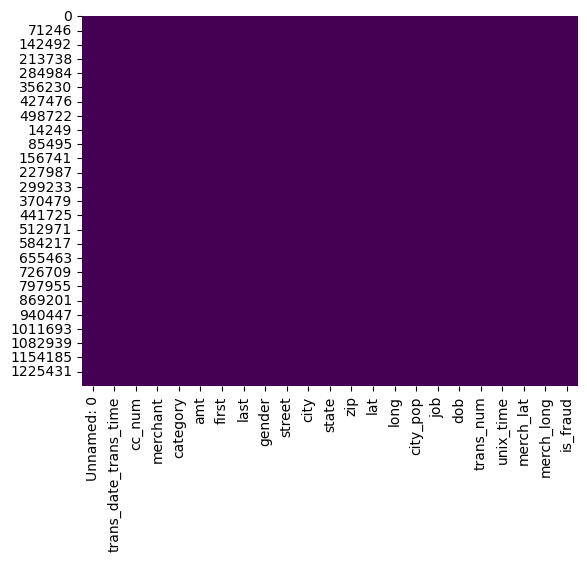

In [16]:
sns.heatmap(Data.isnull(),cmap = 'viridis',cbar = False)

In [17]:
Fraudulent = Data[Data['is_fraud'] == 1]


In [18]:
Fraudulent.shape

(9651, 23)

In [19]:
Fraudulent.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1685,1685,2020-06-21 22:06:39,3560725013359375,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.604290,1
1767,1767,2020-06-21 22:32:22,6564459919350820,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,1958-09-10,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461127,-91.147148,1
1781,1781,2020-06-21 22:37:27,6564459919350820,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,1958-09-10,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771834,-90.158365,1
1784,1784,2020-06-21 22:38:55,4005676619255478,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,1994-05-31,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204974,-90.261595,1
1857,1857,2020-06-21 23:02:16,3560725013359375,fraud_Hermann and Sons,shopping_pos,842.65,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,f6838c01f5d2262006e6b71d33ba7c6d,1371855736,31.315782,-102.736390,1
1891,1891,2020-06-21 23:16:12,3524574586339330,fraud_Thompson-Gleason,health_fitness,22.55,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,0bac42920027f9b7b3d328bda2709983,1371856572,28.396402,-80.819469,1
1906,1906,2020-06-21 23:21:44,4005676619255478,fraud_Kuhic LLC,shopping_net,1128.26,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,1994-05-31,eb388ceabaf56474808664772b2d5853,1371856904,30.354797,-91.146131,1
1956,1956,2020-06-21 23:35:27,4005676619255478,"fraud_Reichert, Rowe and Mraz",shopping_net,931.82,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,1994-05-31,aff46f2741b3501d32b447f842618666,1371857727,30.761363,-91.713600,1
1968,1968,2020-06-21 23:40:26,4005676619255478,"fraud_Kihn, Abernathy and Douglas",shopping_net,983.00,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,1994-05-31,8cabf98e58e2b29f7684362fea1f026c,1371858026,29.902451,-91.749089,1
2026,2026,2020-06-21 23:59:05,6564459919350820,fraud_Lemke-Gutmann,shopping_net,955.16,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,1958-09-10,1799ffe421a2a05dc87903e379140f55,1371859145,43.027879,-90.493768,1


In [20]:
Fraudulent.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,9.651000e+03,9.651000e+03,9651.000000,9651.000000,9651.000000,9651.000000,9.651000e+03,9.651000e+03,9651.000000,9651.000000,9651.0
mean,5.398492e+05,3.970393e+17,530.661412,47999.638379,38.742813,-90.033730,8.999842e+04,1.355323e+09,38.734962,-90.037919,1.0
std,3.930834e+05,1.276696e+18,391.028873,27140.975802,5.153060,14.250246,3.062833e+05,1.793362e+07,5.192904,14.268910,0.0
min,1.685000e+03,6.041621e+10,1.060000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325466e+09,19.161782,-166.550779,1.0
25%,1.896565e+05,1.800174e+14,240.075000,24433.000000,35.042850,-96.727000,7.950000e+02,1.339520e+09,35.087441,-96.678370,1.0
50%,4.539370e+05,3.521261e+15,390.000000,46946.000000,39.537000,-87.043600,2.693000e+03,1.355276e+09,39.516424,-87.167538,1.0
75%,9.005445e+05,4.603179e+15,902.365000,70447.000000,42.076500,-79.940300,1.905400e+04,1.370567e+09,42.043486,-79.907350,1.0
max,1.295733e+06,4.992346e+18,1376.040000,99921.000000,66.693300,-67.950300,2.906700e+06,1.387754e+09,67.510267,-66.960745,1.0


# Non_Fraudulent Transaction analysis

In [21]:
Non_Fraudulent = Data[Data['is_fraud'] == 0]

In [22]:
Non_Fraudulent.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
5,5,2020-06-21 12:15:37,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,...,42.1939,-76.7361,520,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0
6,6,2020-06-21 12:15:44,213180742685905,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,...,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0
7,7,2020-06-21 12:15:50,3589289942931264,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,...,43.7557,-97.5936,343,"Development worker, international aid",1972-03-05,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,0
8,8,2020-06-21 12:16:10,3596357274378601,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,...,41.0001,-78.2357,3688,Advice worker,1973-05-27,71a1da150d1ce510193d7622e08e784e,1371816970,41.546067,-78.120238,0
9,9,2020-06-21 12:16:11,3546897637165774,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,...,31.6591,-96.8094,263,Barrister,1956-05-30,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,0


In [23]:
Non_Fraudulent.shape

(1842743, 23)

In [24]:
Non_Fraudulent.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.842743e+06,1.842743e+06,1.842743e+06,1.842743e+06,1.842743e+06,1.842743e+06,1.842743e+06,1.842743e+06,1.842743e+06,1.842743e+06,1842743.0
mean,5.371795e+05,4.174926e+17,6.765128e+01,4.881752e+04,3.853825e+01,-9.022885e+01,8.863658e+04,1.358692e+09,3.853795e+01,-9.022893e+01,0.0
std,3.667690e+05,1.309282e+18,1.535481e+02,2.688042e+04,5.071020e+00,1.374521e+01,3.014624e+05,1.819482e+07,5.105124e+00,1.375697e+01,0.0
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.0
25%,2.317565e+05,1.800429e+14,9.610000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343045e+09,3.473841e+01,-9.690063e+01,0.0
50%,4.631370e+05,3.521417e+15,4.724000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357123e+09,3.936808e+01,-8.744194e+01,0.0
75%,8.332915e+05,4.642255e+15,8.256000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374604e+09,4.195588e+01,-8.024696e+01,0.0
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.568990e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.668291e+01,-6.695090e+01,0.0


# Some plots

In [25]:
Data['hash_name'] = hash_pandas_object(
    Data['first'] + ' ' + Data['last']
)

transaction_date = pd.to_datetime(Data['trans_date_trans_time'])
birth_date = pd.to_datetime(Data['dob'])
year_timedelta = np.timedelta64(1, 'Y')
Data['age_years'] = (transaction_date - birth_date) / year_timedelta

# Extract hour, minute, and second components from trans_date_trans_time
transaction_time = pd.to_datetime(Data['trans_date_trans_time']).dt.time
hour = [t.hour for t in transaction_time]
minute = [t.minute for t in transaction_time]
second = [t.second for t in transaction_time]

# Convert the time components into total seconds
total_seconds = [h * 3600 + m * 60 + s for h, m, s in zip(hour, minute, second)]
Data['trans_time_seconds'] = total_seconds

Data.drop(columns=['Unnamed: 0'], inplace=True)

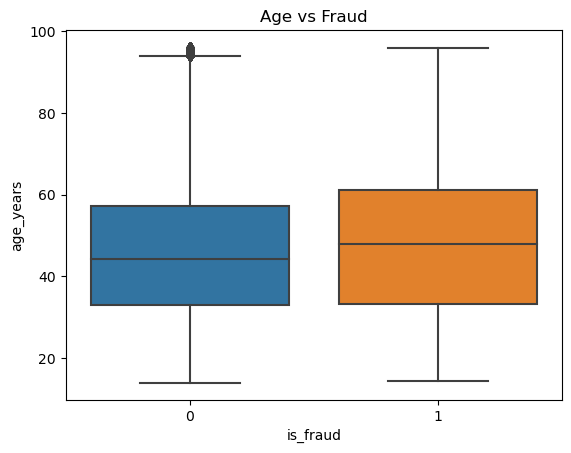

In [26]:
sns.boxplot(y='age_years', x='is_fraud', data=Data)
plt.title('Age vs Fraud')
plt.show()


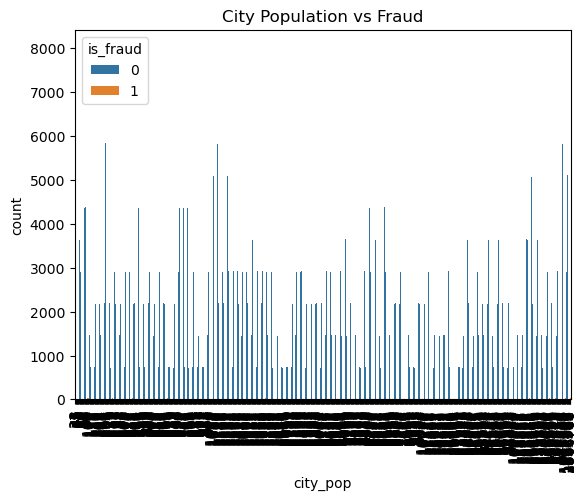

In [27]:
sns.countplot(x='city_pop', hue='is_fraud', data=Data)
plt.title("City Population vs Fraud")
plt.xticks(rotation=90)
plt.show()

In [28]:

# Assuming Data is your DataFrame
#Data['hash_name'] = hash_pandas_object(Data['first'] + ' ' + Data['last'])


#transaction_date = pd.to_datetime(Data['trans_date_trans_time'])
#birth_date = pd.to_datetime(Data['dob'])
#year_timedelta = np.timedelta64(1, 'Y')
#Data['age_years'] = (transaction_date - birth_date) / year_timedelta

# Extract hour, minute, and second components from trans_date_trans_time
#transaction_time = pd.to_datetime(Data['trans_date_trans_time']).dt.time
#hour = [t.hour for t in transaction_time]
#minute = [t.minute for t in transaction_time]
#second = [t.second for t in transaction_time]

# Convert the time components into total seconds
#total_seconds = [h * 3600 + m * 60 + s for h, m, s in zip(hour, minute, second)]
#Data['trans_time_seconds'] = total_seconds

#Data.drop(columns=['Unnamed: 0'], inplace=True)


# EDA

In [29]:
Duplicate= Fraudulent[Fraudulent.duplicated()]
print("Number of duplicated rows: ", Duplicate.shape)

Number of duplicated rows:  (0, 23)


In [30]:
Fraudulent.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [31]:
Fraudulent.describe().style.format('{:.2f}')

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,9651.00,9651.00,9651.00,9651.00,9651.00,9651.00,9651.00,9651.00,9651.00,9651.00,9651.00
mean,539849.25,397039334855339008.00,530.66,47999.64,38.74,-90.03,89998.42,1355323092.34,38.73,-90.04,1.00
std,393083.35,1276696298343719168.00,391.03,27140.98,5.15,14.25,306283.34,17933616.90,5.19,14.27,0.00
min,1685.00,60416207185.00,1.06,1257.00,20.03,-165.67,23.00,1325466397.00,19.16,-166.55,1.00
25%,189656.50,180017442990269.00,240.07,24433.00,35.04,-96.73,795.00,1339519795.50,35.09,-96.68,1.00
50%,453937.00,3521260686633367.00,390.00,46946.00,39.54,-87.04,2693.00,1355275650.00,39.52,-87.17,1.00
75%,900544.50,4603179263222166.00,902.37,70447.00,42.08,-79.94,19054.00,1370566713.00,42.04,-79.91,1.00
max,1295733.00,4992346398065154048.00,1376.04,99921.00,66.69,-67.95,2906700.00,1387754019.00,67.51,-66.96,1.00


In [32]:
fraud = Data[Data['is_fraud'] == 1].describe().T
nofraud = Data[Data['is_fraud'] == 0].describe().T

In [33]:
if len(fraud[['mean']]) >= 30:
    sns.heatmap(fraud[['mean']][15:30], annot=True, cmap=colors, linewidths=0.5, linecolor='black', cbar=False, fmt='.2f')
    plt.title('Fraud Samples : A2')
else:
    print("Insufficient data for Fraud Samples : A2 heatmap.")


Insufficient data for Fraud Samples : A2 heatmap.


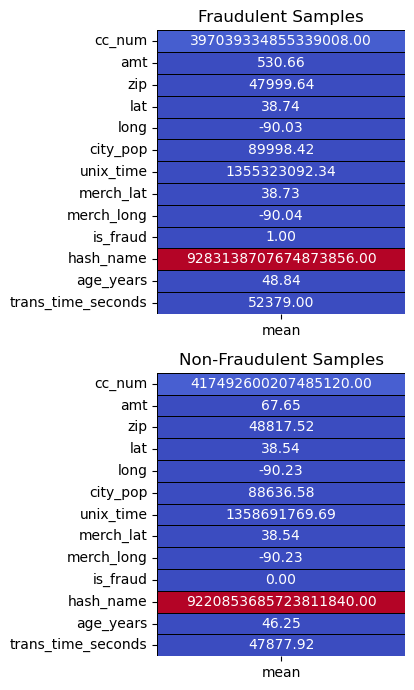

In [34]:
colors = "coolwarm"
def plot_heatmap(df, title):
    sns.heatmap(df, annot=True, cmap=colors, linewidths=0.5, linecolor='black', cbar=False, fmt='.2f', square=False)
    plt.title(title)

# Create the subplots
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

# Plot Fraud Samples : A1 heatmap
plt.subplot(2, 2, 1)
plot_heatmap(fraud[['mean']][:15], "Fraudulent Samples")

# Plot Fraud Samples : A2 heatmap
#plt.subplot(2, 2, 2)
#plot_heatmap(fraud[['mean']][15:30], "Fraud Samples : A2")

# Plot No Fraud Samples : B1 heatmap
plt.subplot(2, 2, 3)
plot_heatmap(nofraud[['mean']][:15], "Non-Fraudulent Samples")

# Plot No Fraud Samples : B2 heatmap
#plt.subplot(2, 2, 4)
#plot_heatmap(nofraud[['mean']][15:30], "No Fraud Samples : B2")

fig.tight_layout(w_pad=2)
plt.show()


In [35]:
#sns.countplot(x='trans_time_seconds', data=Data)
#plt.title('Time distribution')
#plt.xticks(rotation=0)
#plt.show()

# Some more plots

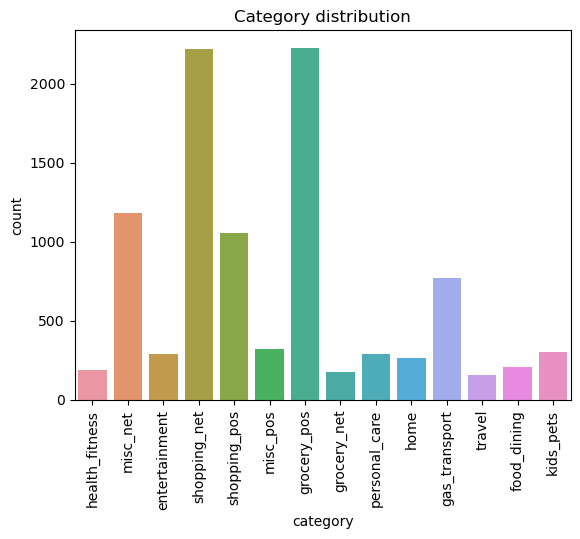

In [36]:
sns.countplot(x='category', data=Fraudulent)
plt.title('Category distribution')
plt.xticks(rotation=90)
plt.show()

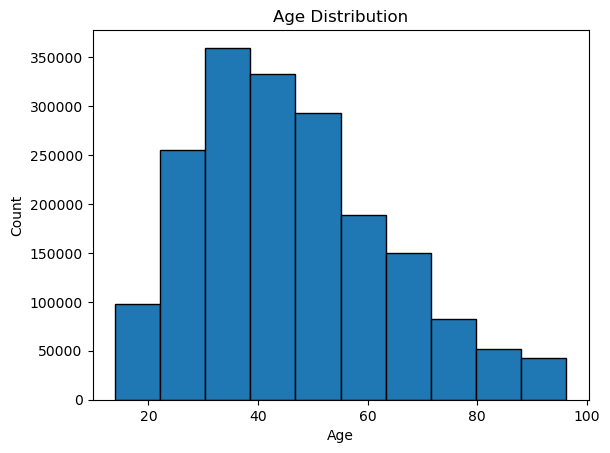

In [37]:
plt.hist(Data['age_years'], edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

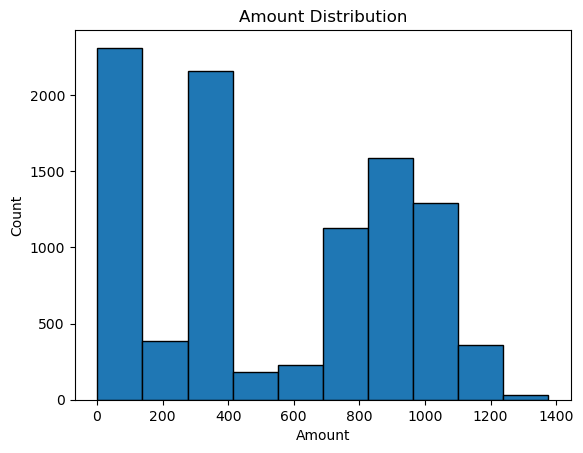

In [38]:
plt.hist(Fraudulent['amt'], edgecolor='black')
plt.title('Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

In [39]:
#plt.hist(Non_Fraudulent['amt'], edgecolor='red')
#plt.title('Amount Distribution')
#plt.xlabel('Amount')
#plt.ylabel('Count')
#plt.show()

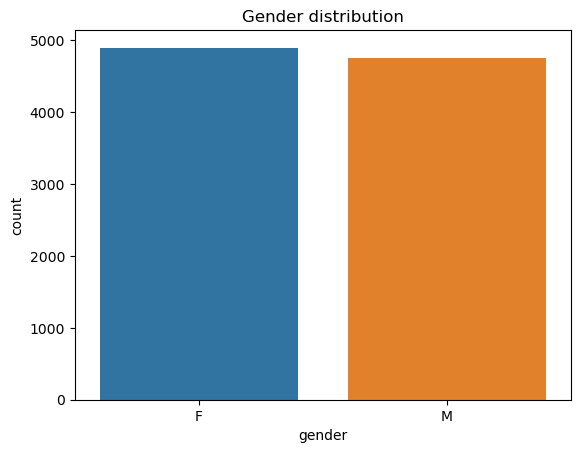

In [40]:
sns.countplot(x='gender', data=Fraudulent)
plt.title('Gender distribution')
plt.show()

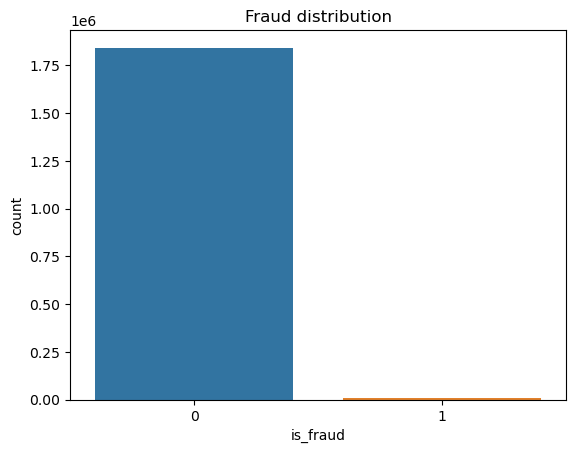

In [41]:
sns.countplot(x='is_fraud', data=Data)
plt.title('Fraud distribution')
plt.show()

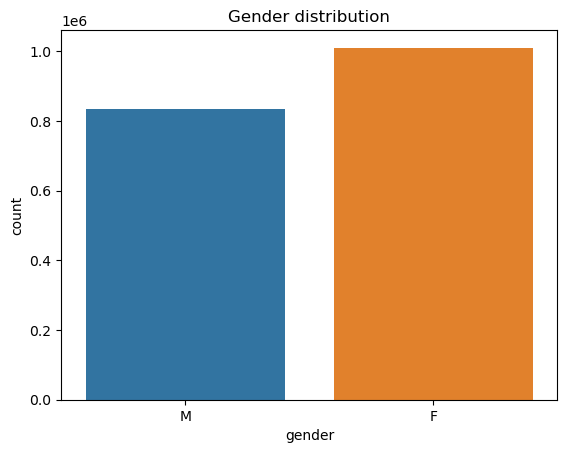

In [42]:
sns.countplot(x='gender', data=Non_Fraudulent)
plt.title('Gender distribution')
plt.show()

In [43]:
#sns.boxplot(y='age_years', x='is_fraud', data=Data)
#plt.title('Age vs Fraud')
#plt.show()


In [44]:
#plt.figure(figsize=(20, 10))
#sns.countplot(x='amt', data=Fraudulent)
#plt.title('Amount distribution')
#plt.xticks(rotation=30)
#plt.show()

In [45]:

# Assuming your DataFrame is named 'Data'

# Handle non-numeric columns - Extract day, month, year, and hour from the date-time column
#Data['day'] = Data['trans_date_trans_time'].dt.day
#Data['month'] = Data['trans_date_trans_time'].dt.month
#Data['year'] = Data['trans_date_trans_time'].dt.year
#Data['hour'] = Data['trans_date_trans_time'].dt.hour

# Drop the original date-time column and other non-numeric columns from the DataFrame
columns_to_drop = ['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'job', 'trans_num' ]
Data = Data.drop(columns=columns_to_drop)

# Extract features and target
features = Data.loc[:, :'amt']
target = Data.loc[:, 'is_fraud']

# Create SelectKBest instance and fit
#best_features = SelectKBest(score_func=f_classif, k='all')
#fit = best_features.fit(features, target)

# Create a DataFrame to store feature scores
#featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['ANOVA Score'])

# Sort the features based on ANOVA scores in descending order
#featureScores = featureScores.sort_values(ascending=False, by='ANOVA Score')

# Set up the heatmap figure
#fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot the heatmap for Part 1 of feature scores
#plt.subplot(1, 2, 1)
#sns.heatmap(featureScores.iloc[:15, :], annot=True, cmap='viridis', linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
#plt.title('ANOVA Score : Part 1')

# Plot the heatmap for Part 2 of feature scores
#plt.subplot(1, 2, 2)
#sns.heatmap(featureScores.iloc[15:30], annot=True, cmap='viridis', linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
#plt.title('ANOVA Score : Part 2')

# Adjust subplot layout
#fig.tight_layout(w_pad=2)

# Show the plot
#plt.show()


In [46]:
# Assuming your DataFrame is named 'Data'

# Handle non-numeric columns - Extract day, month, year, and hour from the date-time column
#Data['day'] = Data['trans_date_trans_time'].dt.day
#Data['month'] = Data['trans_date_trans_time'].dt.month
#Data['year'] = Data['trans_date_trans_time'].dt.year
#Data['hour'] = Data['trans_date_trans_time'].dt.hour

# Drop the original date-time column and other non-numeric columns from the DataFrame
#columns_to_drop = ['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'job', 'trans_num']
#Data = Data.drop(columns=columns_to_drop)

# Extract features and target
#features = Data.loc[:, :'amt']
#target = Data.loc[:, 'is_fraud']

# Create SelectKBest instance and fit
#best_features = SelectKBest(score_func=f_classif, k='all')
#fit = best_features.fit(features, target)

# Create a DataFrame to store feature scores
#featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['ANOVA Score'])

# Sort the features based on ANOVA scores in descending order
#featureScores = featureScores.sort_values(ascending=False, by='ANOVA Score')

# Check if there are features to display in the heatmap
#if not featureScores.empty:
    # Set up the heatmap figure
 #   fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    # Plot the heatmap for Part 1 of feature scores
  #  plt.subplot(1, 2, 1)
   # sns.heatmap(featureScores.iloc[:15, :], annot=True, cmap='viridis', linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
    #plt.title('ANOVA Score : Part 1')

    # Plot the heatmap for Part 2 of feature scores (if available)
    #if featureScores.shape[0] >= 30:
     #   plt.subplot(1, 2, 2)
      #  sns.heatmap(featureScores.iloc[15:30], annot=True, cmap='viridis', linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
       # plt.title('ANOVA Score : Part 2')

    # Adjust subplot layout
    #fig.tight_layout(w_pad=2)

    # Show the plot
    #plt.show()
#else:
 #   print("No features available for heatmap.")


In [47]:
df1 = Data[['cc_num','trans_time_seconds','amt','zip','lat','long','city_pop','unix_time','merch_lat','merch_long','is_fraud']].copy(deep = True)
df1.head()

,cc_num,trans_time_seconds,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2291163933867244,44065,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,3573030041201292,44073,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0
2,3598215285024754,44093,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0
3,3591919803438423,44115,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0
4,3526826139003047,44117,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0


In [48]:
df1.shape

(1852394, 11)

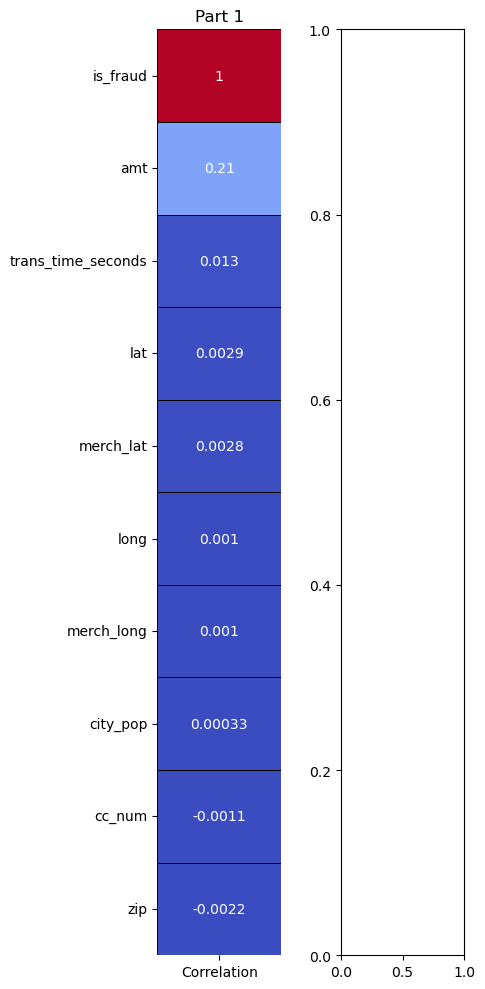

In [49]:
corr = df1.corrwith(df1['is_fraud']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(corr.iloc[:10,:],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 1')

#plt.subplot(1,2,2)
#sns.heatmap(corr.iloc[15:30],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)
#plt.title('Part 2')

fig.tight_layout(w_pad = 2)

# For feature selection purposes, i'll exclude the columns with correlation values in the interval: [-0.01 - 0]

In [50]:
df1.shape

(1852394, 11)

In [51]:
df2= Data[['amt','trans_time_seconds','lat','long','merch_lat','merch_long','is_fraud']].copy(deep = True)
df2.head()

,amt,trans_time_seconds,lat,long,merch_lat,merch_long,is_fraud
0,2.86,44065,33.9659,-80.9355,33.986391,-81.200714,0
1,29.84,44073,40.3207,-110.4360,39.450498,-109.960431,0
2,41.28,44093,40.6729,-73.5365,40.495810,-74.196111,0
3,60.05,44115,28.5697,-80.8191,28.812398,-80.883061,0
4,3.19,44117,44.2529,-85.0170,44.959148,-85.884734,0


# Dealing with Class Imbalances

In [52]:
over = SMOTE(sampling_strategy = 0.8)
under = RandomUnderSampler(sampling_strategy = 0.008)
f1 = df2.iloc[:,:6].values
t1 = df2.iloc[:,6].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0: 1206375, 1: 965100})

# After balancing the dataset, the Non-Fraudulent is now 1608500 and the Fraudulent is 1286800

# For imbalanced datasets, we duplicate the data to deal with the potential bias in the predictions.
Due to this duplication process, we are using synthetic data for modeling purposes to ensure that the predictions are not skewed towards the majority target class value.
Thus, evaluating models using accuracy will be misleading. Instead, we will go for confusion matrix, ROC-AUC graph and ROC-AUC score for model evaluation.

In [53]:
Fraudulent.shape

(9651, 23)

In [54]:
Non_Fraudulent.shape

(1842743, 23)

In [55]:
Fraudulent.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1685,1685,2020-06-21 22:06:39,3560725013359375,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.604290,1
1767,1767,2020-06-21 22:32:22,6564459919350820,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,1958-09-10,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461127,-91.147148,1
1781,1781,2020-06-21 22:37:27,6564459919350820,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,1958-09-10,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771834,-90.158365,1
1784,1784,2020-06-21 22:38:55,4005676619255478,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,1994-05-31,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204974,-90.261595,1
1857,1857,2020-06-21 23:02:16,3560725013359375,fraud_Hermann and Sons,shopping_pos,842.65,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,f6838c01f5d2262006e6b71d33ba7c6d,1371855736,31.315782,-102.736390,1
1891,1891,2020-06-21 23:16:12,3524574586339330,fraud_Thompson-Gleason,health_fitness,22.55,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,0bac42920027f9b7b3d328bda2709983,1371856572,28.396402,-80.819469,1
1906,1906,2020-06-21 23:21:44,4005676619255478,fraud_Kuhic LLC,shopping_net,1128.26,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,1994-05-31,eb388ceabaf56474808664772b2d5853,1371856904,30.354797,-91.146131,1
1956,1956,2020-06-21 23:35:27,4005676619255478,"fraud_Reichert, Rowe and Mraz",shopping_net,931.82,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,1994-05-31,aff46f2741b3501d32b447f842618666,1371857727,30.761363,-91.713600,1
1968,1968,2020-06-21 23:40:26,4005676619255478,"fraud_Kihn, Abernathy and Douglas",shopping_net,983.00,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,1994-05-31,8cabf98e58e2b29f7684362fea1f026c,1371858026,29.902451,-91.749089,1
2026,2026,2020-06-21 23:59:05,6564459919350820,fraud_Lemke-Gutmann,shopping_net,955.16,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,1958-09-10,1799ffe421a2a05dc87903e379140f55,1371859145,43.027879,-90.493768,1


# Fitting Models

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
import matplotlib.pyplot as plt

In [57]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(f1, t1, test_size = 0.20, random_state = 2)

# Traditional Algorithms viz: Logistic regression, K-NN and SVM

# 1. The Logistic regression Model Fitting

In [58]:

# Call the model function to generate predictions
#predictions = model(classifier_lr, x_train1, y_train1, x_test1, y_test1)

# Call the model_evaluation function to evaluate the model
#model_evaluation(classifier_lr, x_test1, y_test1, predictions)


def model(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    print("Cross Validation Score:", '{0:.2%}'.format(cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score:", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))
    plot_roc_curve(classifier, x_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()
    
    model_evaluation(classifier, x_test, y_test, prediction)

def model_evaluation(classifier, x_test, y_test, prediction):
    # Calculate and print AUPRC score
    average_precision = average_precision_score(y_test, prediction)
    print("AUPRC Score:", '{0:.2%}'.format(average_precision))
    
    # Plot Precision-Recall curve
    plot_precision_recall_curve(classifier, x_test, y_test)
    plt.title('Precision-Recall Curve')
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{is_fraud}\n{zip}\n{amt}' for is_fraud, zip, amt in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')
    
    # Classification Report
    print(classification_report(y_test, classifier.predict(x_test)))


In [59]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 

Cross Validation Score: 83.84%
ROC_AUC Score: 85.43%


C:\Users\joeya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


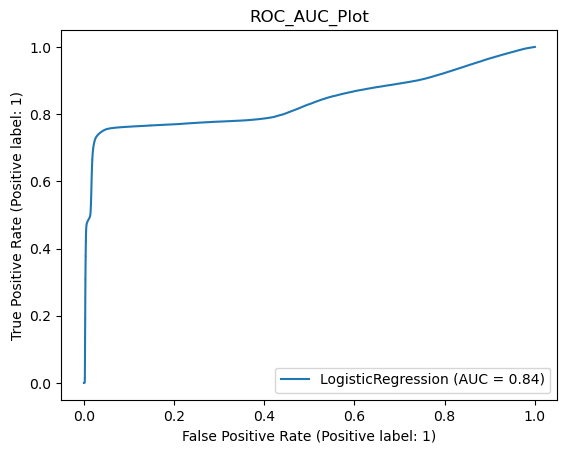

AUPRC Score: 81.53%


C:\Users\joeya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


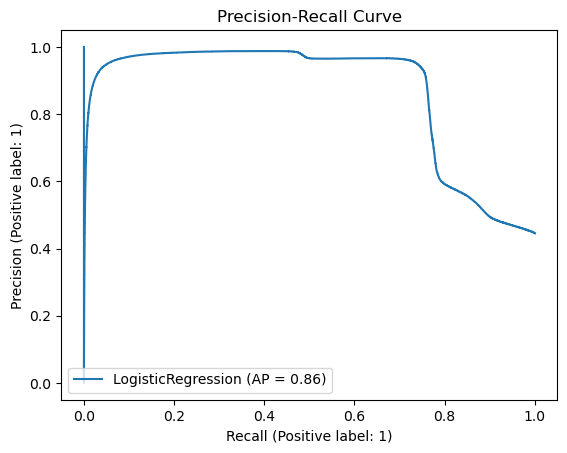

              precision    recall  f1-score   support

           0       0.83      0.96      0.89    240947
           1       0.94      0.75      0.83    193348

    accuracy                           0.87    434295
   macro avg       0.88      0.85      0.86    434295
weighted avg       0.88      0.87      0.86    434295



NameError: name 'predictions' is not defined

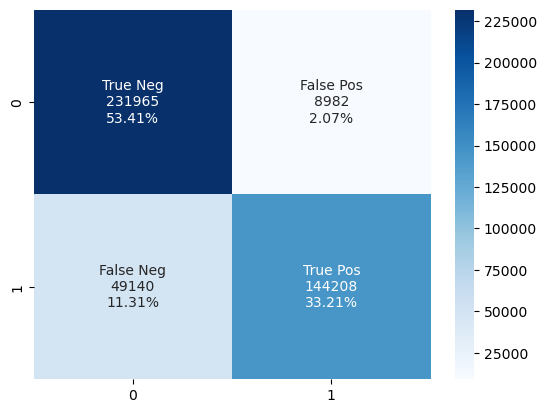

In [60]:
model(classifier_lr,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_lr,x_test1,y_test1,predictions)
# Call the model function to generate predictions
#predictions = model(classifier_lr, x_train1, y_train1, x_test1, y_test1)

# Call the model_evaluation function with the generated predictions
#model_evaluation(classifier_lr, x_test1, y_test1, predictions)

# 2. K-NN Algorithm

In [61]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

C:\Users\joeya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Cross Validation Score: 98.84%
ROC_AUC Score: 97.59%


C:\Users\joeya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


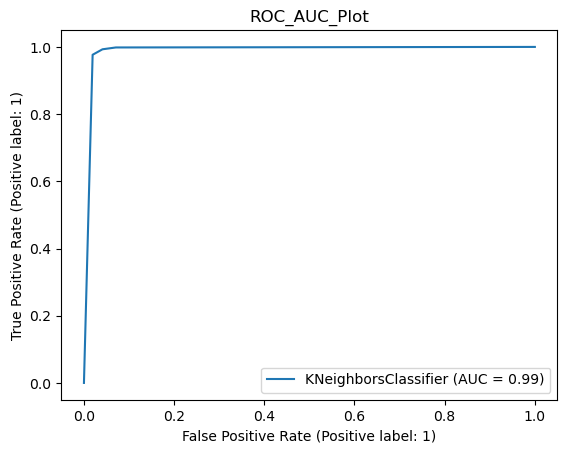

AUPRC Score: 94.74%


C:\Users\joeya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


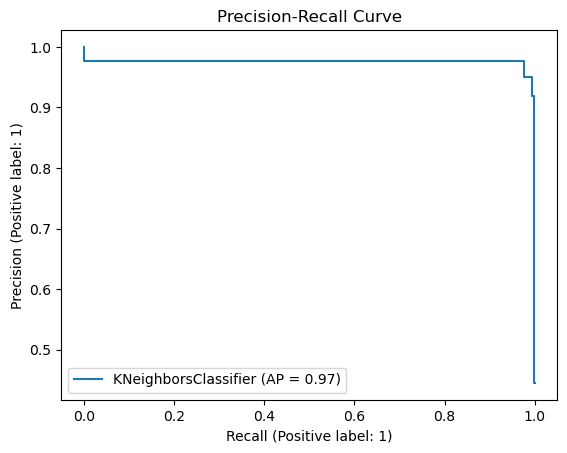

C:\Users\joeya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\joeya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

              precision    recall  f1-score   support

           0       0.99      0.96      0.98    240947
           1       0.95      0.99      0.97    193348

    accuracy                           0.97    434295
   macro avg       0.97      0.98      0.97    434295
weighted avg       0.97      0.97      0.97    434295



TypeError: model_evaluation() missing 1 required positional argument: 'prediction'

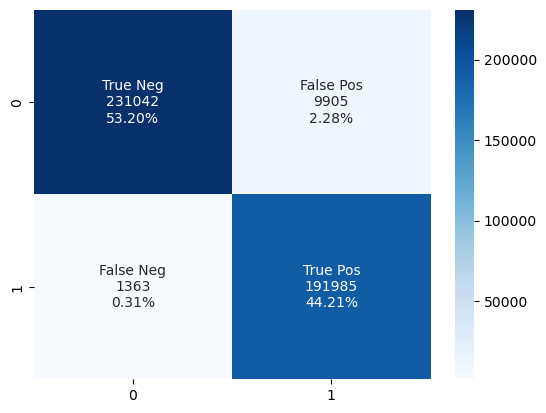

In [62]:
model(classifier_knn,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_knn,x_test1,y_test1)

# Ensemble Algorithms: Adaboost, Random Forest, Xgboost?

In [ ]:
# Create an instance of the MLPClassifier
#classifier_ann = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=0)


In [ ]:
# Train, evaluate, and plot results
#model(classifier_ann, x_train1, y_train1, x_test1, y_test1)
#model_evaluation(classifier_ann, x_test1, y_test1)

# 3. Random Forest

In [76]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Cross Validation Score: 96.10%
ROC_AUC Score: 89.03%


C:\Users\joeya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


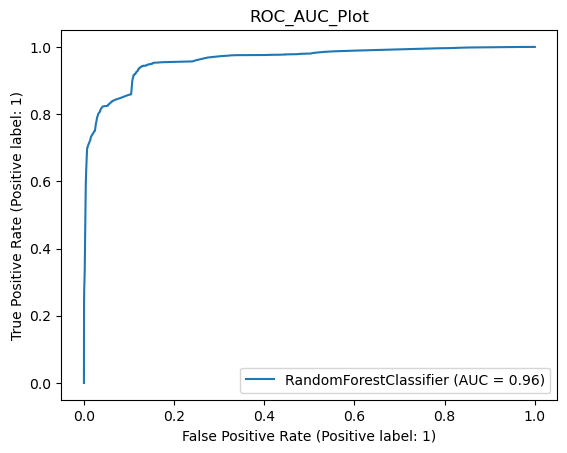

AUPRC Score: 85.30%


C:\Users\joeya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


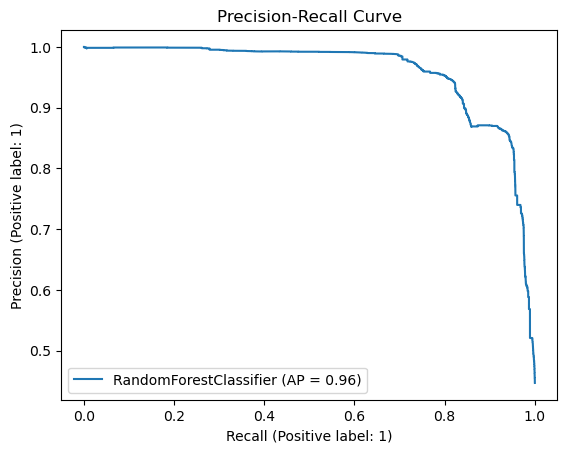

              precision    recall  f1-score   support

           0       0.87      0.96      0.91    240947
           1       0.94      0.82      0.88    193348

    accuracy                           0.90    434295
   macro avg       0.91      0.89      0.89    434295
weighted avg       0.90      0.90      0.90    434295



TypeError: model_evaluation() missing 1 required positional argument: 'prediction'

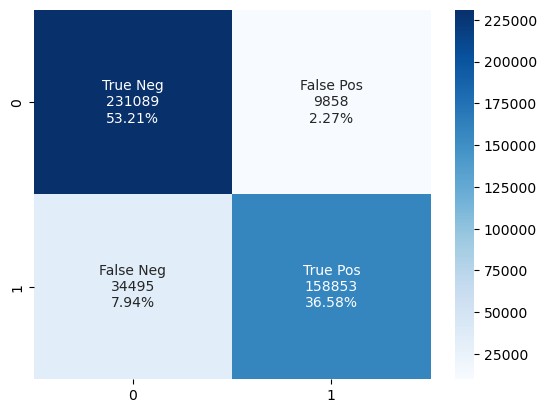

In [77]:
model(classifier_rf,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_rf,x_test1,y_test1)

# 4. Adaboost Algorithm

In [72]:
classifier_ada = AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, random_state=0)

Cross Validation Score: 97.47%
ROC_AUC Score: 93.08%


C:\Users\joeya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


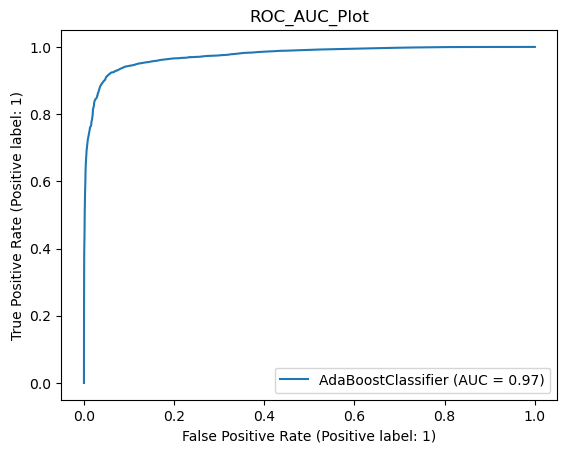

AUPRC Score: 89.23%


C:\Users\joeya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


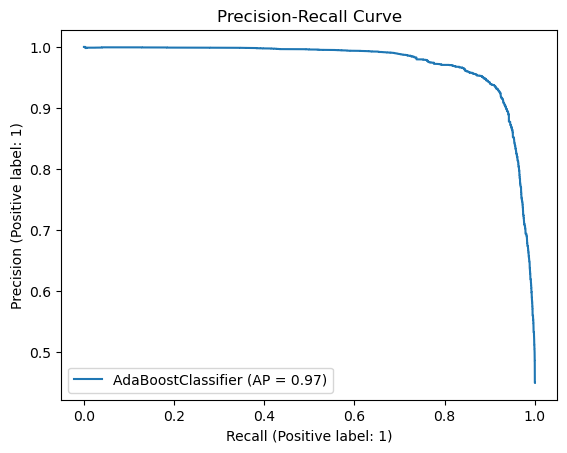

              precision    recall  f1-score   support

           0       0.93      0.95      0.94    240947
           1       0.94      0.91      0.92    193348

    accuracy                           0.93    434295
   macro avg       0.93      0.93      0.93    434295
weighted avg       0.93      0.93      0.93    434295



TypeError: model_evaluation() missing 1 required positional argument: 'prediction'

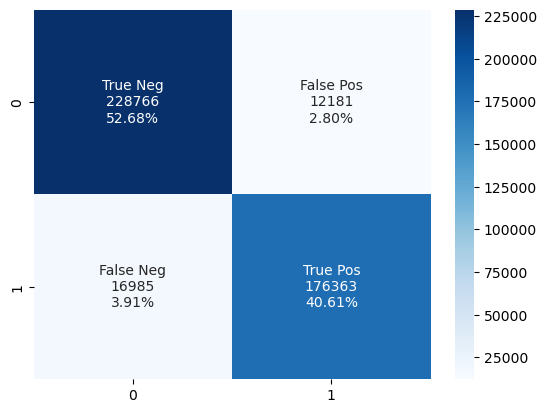

In [73]:
model(classifier_ada,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_ada,x_test1,y_test1)

# 5. Xgboost (Extreme Gradient Boosting Algorithm)

In [65]:
classifier_xgb = xgb.XGBClassifier(max_depth=3, n_estimators=100, learning_rate=0.1, random_state=0)

Cross Validation Score: 97.89%
ROC_AUC Score: 93.46%


C:\Users\joeya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


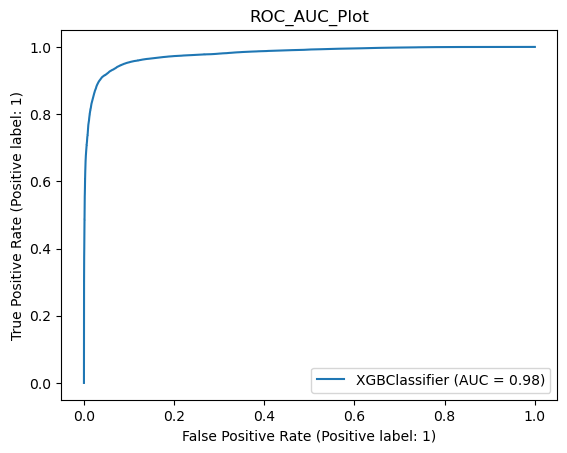

AUPRC Score: 89.71%


C:\Users\joeya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


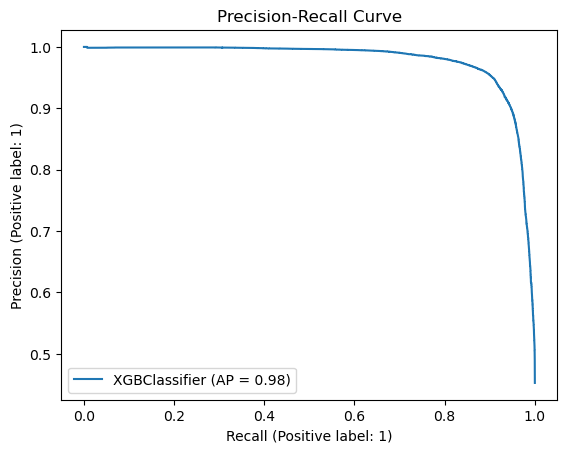

              precision    recall  f1-score   support

           0       0.94      0.95      0.94    240947
           1       0.94      0.92      0.93    193348

    accuracy                           0.94    434295
   macro avg       0.94      0.93      0.94    434295
weighted avg       0.94      0.94      0.94    434295



TypeError: model_evaluation() missing 1 required positional argument: 'prediction'

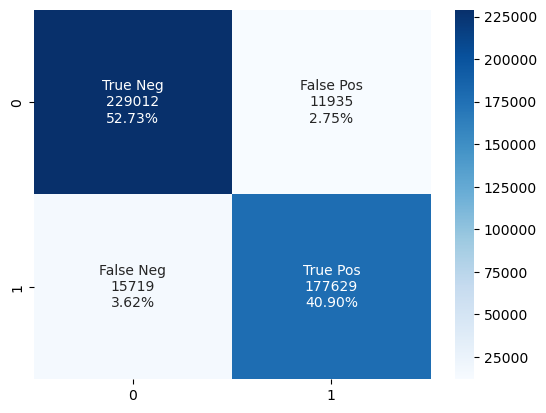

In [67]:
model(classifier_xgb,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_xgb,x_test1,y_test1)

# 6. The Decision Tree Classifier

In [74]:
classifier_dt = DecisionTreeClassifier(max_depth=5, random_state=0)

Cross Validation Score: 96.89%
ROC_AUC Score: 93.20%


C:\Users\joeya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


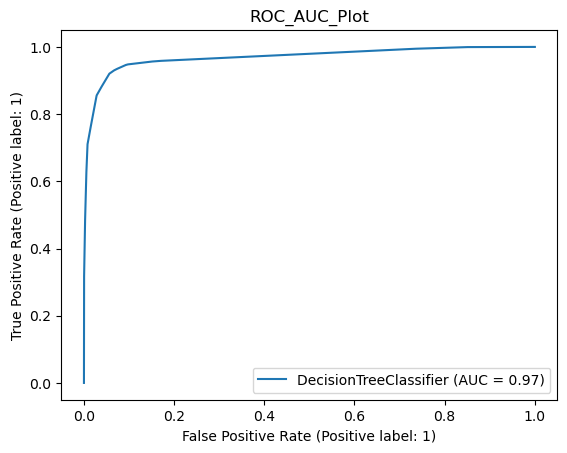

AUPRC Score: 89.06%


C:\Users\joeya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


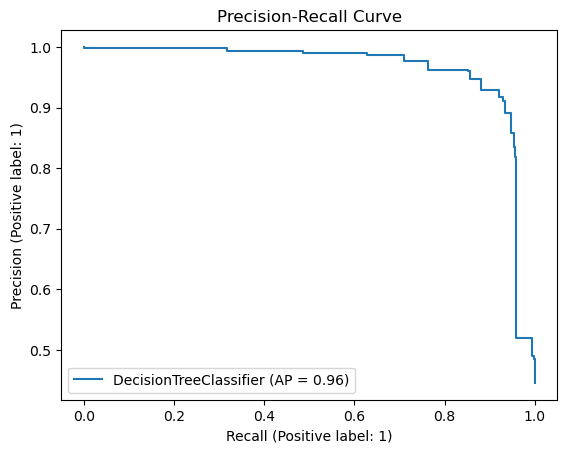

              precision    recall  f1-score   support

           0       0.94      0.94      0.94    240947
           1       0.93      0.92      0.92    193348

    accuracy                           0.93    434295
   macro avg       0.93      0.93      0.93    434295
weighted avg       0.93      0.93      0.93    434295



TypeError: model_evaluation() missing 1 required positional argument: 'prediction'

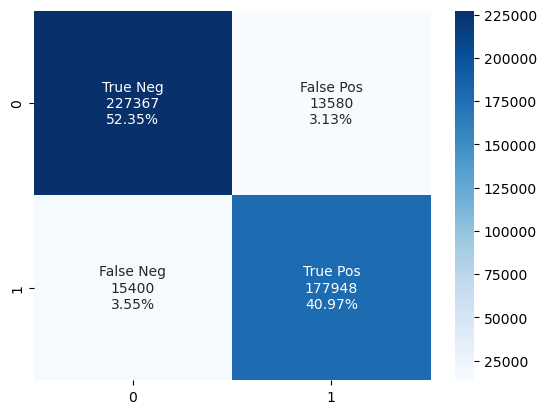

In [75]:
model(classifier_dt, x_train1, y_train1, x_test1, y_test1)
model_evaluation(classifier_dt, x_test1, y_test1)